# **Importing Python Libraries & Reading the Data**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
%matplotlib inline
from sklearn import metrics

import plotly as py
import datetime
from datetime import date
import cufflinks as cf
from plotly.offline import iplot
import plotly.express as px


df = pd.read_csv("../input/fast-food-marketing-campaign-ab-test/WA_Marketing-Campaign.csv")



Using with pandas head function, the first 5 rows can be reviewed.

In [90]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


I will check data types and  null values with info function.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


We can use pandas describe function to get stastical information about numeric variables in our dataset.


In [92]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


# Exploratory Data Analysis

For understanding numeric variables and their relations among them, we can use data visualization methods and statistical results. 

In [93]:
df["MarketID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [94]:
df["LocationID"].nunique()

137

In [95]:
countlocationnumber=df.groupby(['MarketID'])['LocationID'].nunique()
df.groupby(['MarketID'])['LocationID'].nunique()



MarketID
1     13
2      6
3     22
4      9
5     15
6     15
7     15
8     12
9     10
10    20
Name: LocationID, dtype: int64

Lets check which market have how many locations with the pie chart show the percentages'

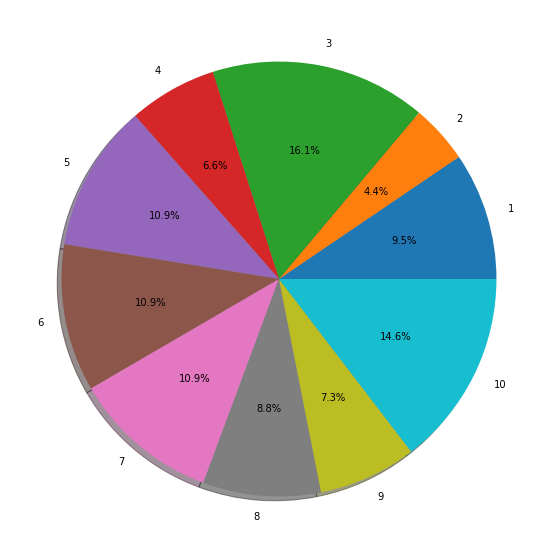

In [96]:
labels=df['MarketID'].unique()
figure(figsize=(10, 10))

plt.pie( countlocationnumber, autopct='%1.1f%%', labels=labels,
        shadow=True)
plt.show() 

The percentage varies from 6.5% to 15%. Market 3 has highest number of stores whereas Market 4 has the lowest.

I want to check how AgeOfStore varies between Market groups, so first we need to apply groupby function then we can measure mean of age.

In [97]:
locmarket_age=df.groupby(['MarketID','LocationID'])['AgeOfStore'].unique()
locmarket_age


MarketID  LocationID
1         1              [4]
          2              [5]
          3             [12]
          4              [1]
          5             [10]
                        ... 
10        916            [7]
          917           [14]
          918            [6]
          919            [2]
          920           [14]
Name: AgeOfStore, Length: 137, dtype: object

In [98]:
Age_mean=locmarket_age.groupby('MarketID').sum()/locmarket_age.groupby('MarketID').count()
Age_mean

MarketID
1       [8.23076923076923]
2                   [14.0]
3     [7.2272727272727275]
4      [8.666666666666666]
5                    [9.8]
6      [7.866666666666666]
7      [7.666666666666667]
8     [11.583333333333334]
9                    [7.7]
10                  [7.05]
Name: AgeOfStore, dtype: object

It can be seen above most of market groups are 7-8 years old. Market 2 have the highest value with 14 years whereas Market 10 and Market 3 have lower ages with close to 7 years old

<AxesSubplot:xlabel='AgeOfStore', ylabel='Count'>

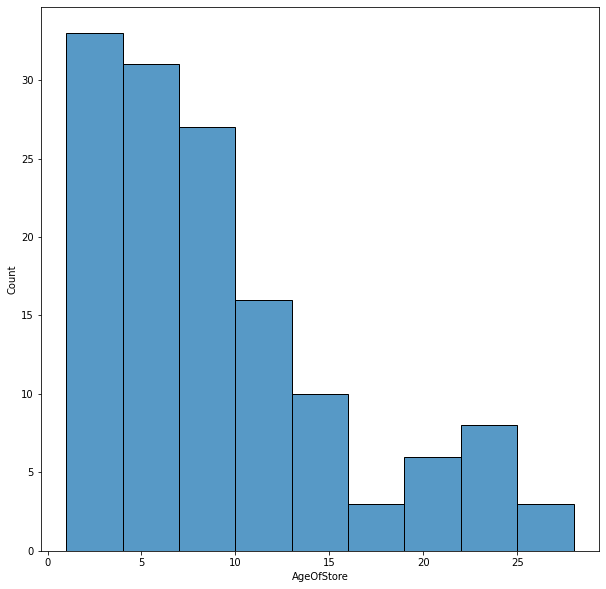

In [99]:
ages=df.groupby(['MarketID','LocationID'])['AgeOfStore'].mean()
figure(figsize=(10, 10))

sns.histplot(data=ages)


<AxesSubplot:xlabel='MarketID'>

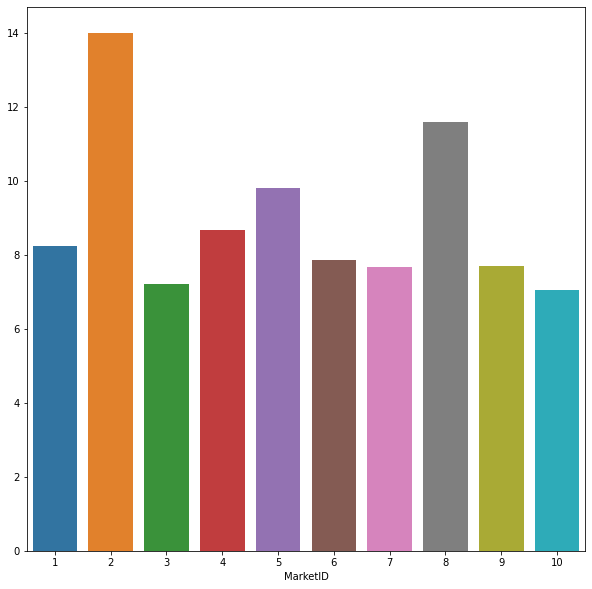

In [100]:
figure(figsize=(10, 10))
sns.barplot(x= Age_mean.index, y=np.concatenate(Age_mean.values).astype(None) )

Lets examine age of store information in terms of marketsize and marketid


In [101]:
df.groupby(["MarketID","LocationID"])["AgeOfStore"].mean().reset_index()

,MarketID,LocationID,AgeOfStore
0,1,1,4.0
1,1,2,5.0
2,1,3,12.0
3,1,4,1.0
4,1,5,10.0
...,...,...,...
132,10,916,7.0
133,10,917,14.0
134,10,918,6.0
135,10,919,2.0


<AxesSubplot:xlabel='AgeOfStore', ylabel='MarketID'>

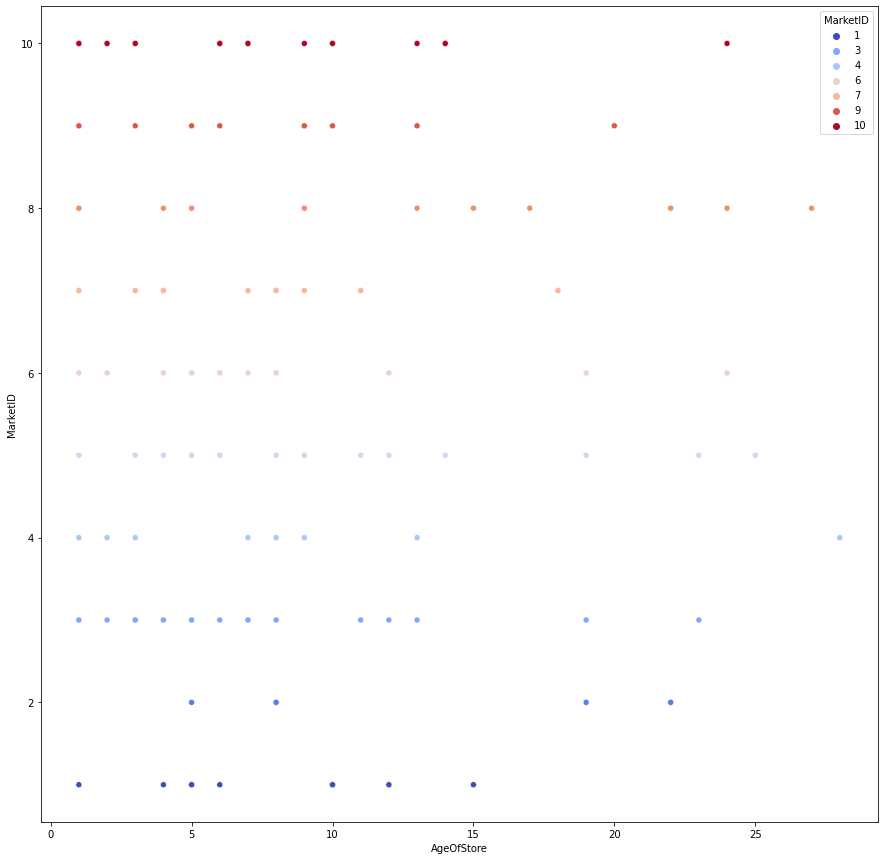

In [102]:
df_group = df.groupby(["MarketID","LocationID"])["AgeOfStore"].mean().reset_index()
figure(figsize=(15, 15))
sns.scatterplot(data=df_group, x="AgeOfStore", y = "MarketID",hue="MarketID",hue_order = df['MarketID'].unique() , palette="coolwarm" )

In [103]:
df.groupby("MarketSize")["AgeOfStore"].mean().reset_index()



,MarketSize,AgeOfStore
0,Large,7.142857
1,Medium,8.787500
2,Small,10.800000


Small markets have higher average ages whereas Large markets have lower ones.

<AxesSubplot:xlabel='AgeOfStore', ylabel='MarketSize'>

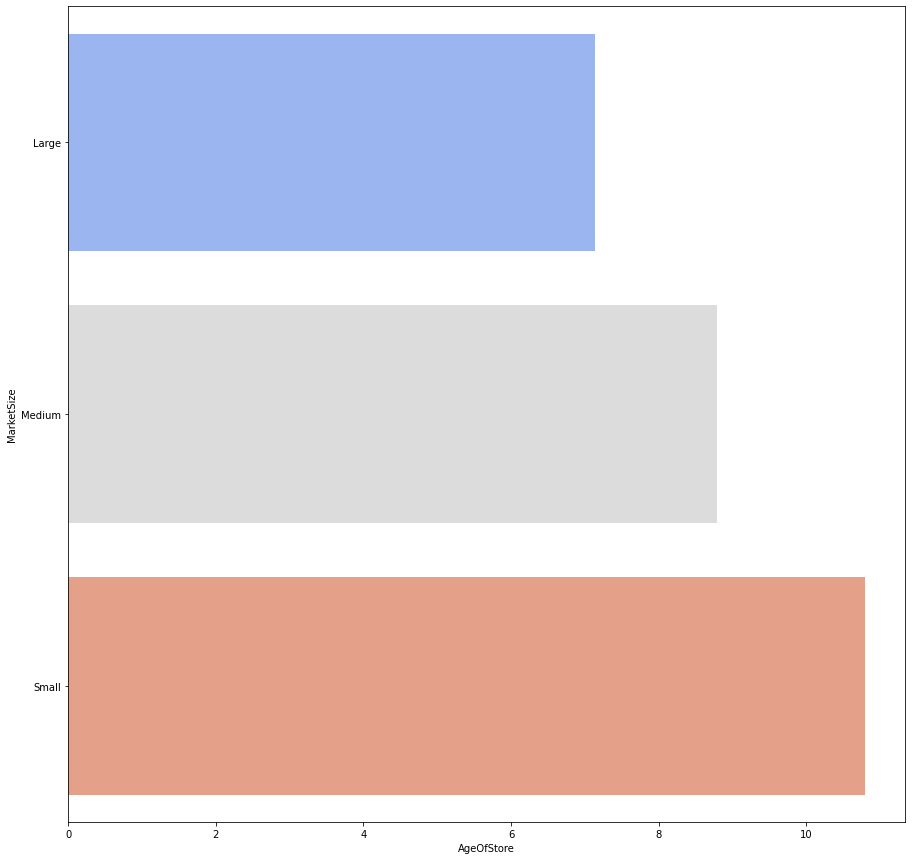

In [104]:
df_group = df.groupby("MarketSize")["AgeOfStore"].mean().reset_index()
figure(figsize=(15, 15))
sns.barplot(data=df_group, x="AgeOfStore", y = "MarketSize", palette="coolwarm" )

<AxesSubplot:xlabel='AgeOfStore', ylabel='Count'>

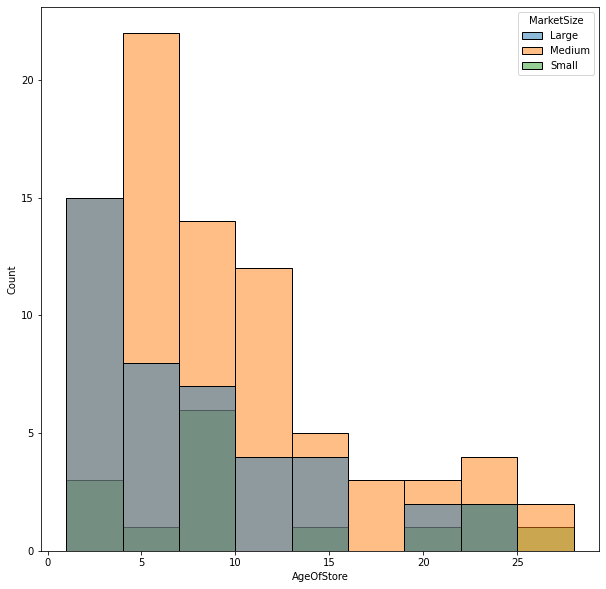

In [105]:
df_group = df.groupby(["MarketSize","LocationID"])["AgeOfStore"].mean().reset_index()

figure(figsize=(10, 10))

sns.histplot(data=df_group,x="AgeOfStore", hue="MarketSize")


In [106]:
 df.groupby("MarketSize")["SalesInThousands"].mean().reset_index()


,MarketSize,SalesInThousands
0,Large,70.116726
1,Medium,43.985344
2,Small,57.409333


<AxesSubplot:xlabel='SalesInThousands', ylabel='AgeOfStore'>

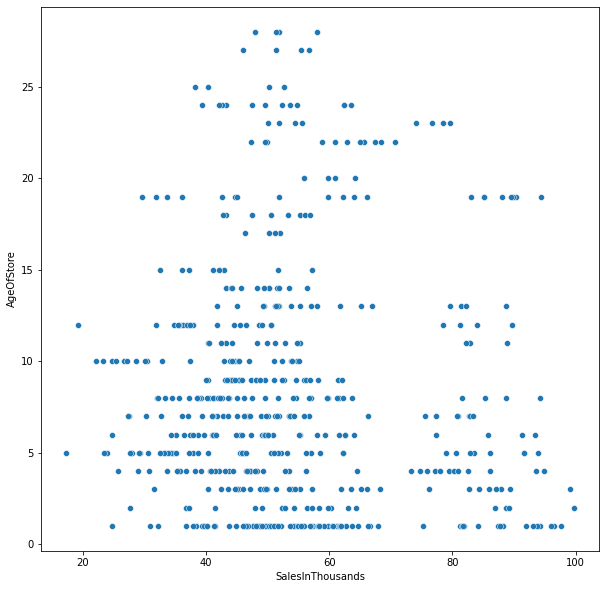

In [107]:
figure(figsize=(10, 10))

sns.scatterplot( x=df['SalesInThousands'], y=df["AgeOfStore"])


<AxesSubplot:xlabel='SalesInThousands', ylabel='AgeOfStore'>

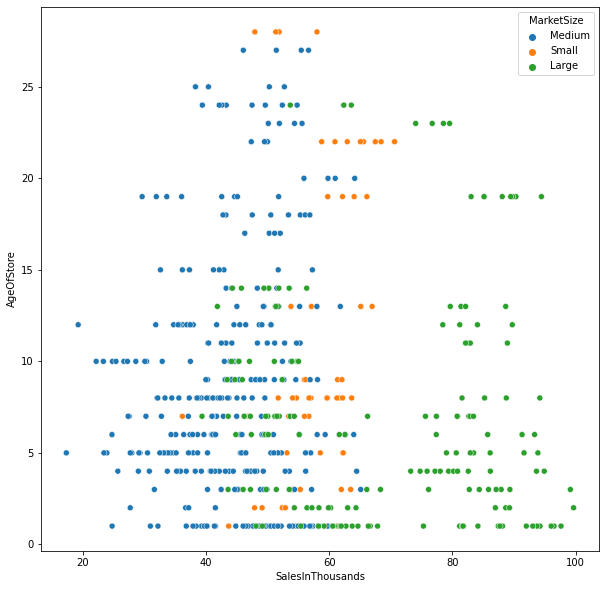

In [108]:
figure(figsize=(10, 10))

sns.scatterplot(  data=df, x='SalesInThousands', y="AgeOfStore", hue="MarketSize" )


According to graph above, Large market size have higher salesvolume whereas medium ones are the lower ones.

Lets look at how many promotions made weekly so far. 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



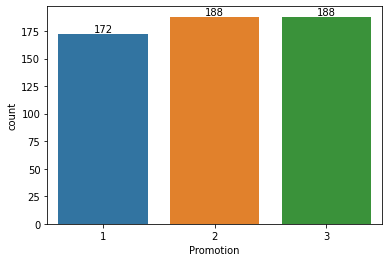

In [109]:
ax=sns.countplot(df['Promotion'])
for container in ax.containers:
    ax.bar_label(container)

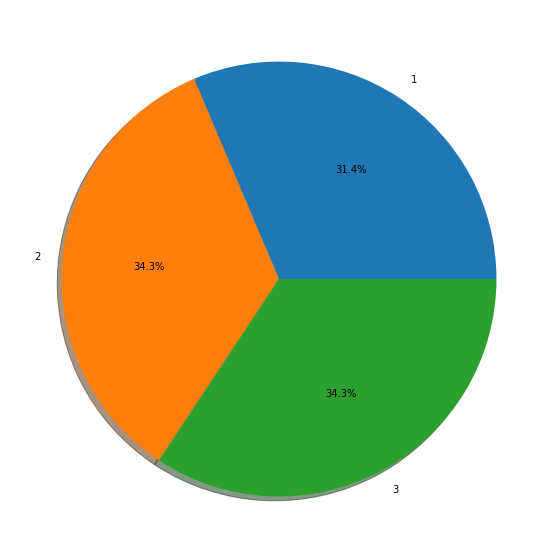

In [110]:
labels=sorted(df['Promotion'].unique())
figure(figsize=(10, 10))

plt.pie( df.groupby('Promotion')['Promotion'].count(), autopct='%1.1f%%', labels=labels,
        shadow=True)
plt.show() 

Number of promotions applied are really close to each other so far as you can see above. Promo 1 made 172 times, Promo 2 & 3 made 188 times.

Lets look at the promotions distribution among distinct MarketID


In [111]:
df.groupby('MarketID')['Promotion'].count()

MarketID
1     52
2     24
3     88
4     36
5     60
6     60
7     60
8     48
9     40
10    80
Name: Promotion, dtype: int64

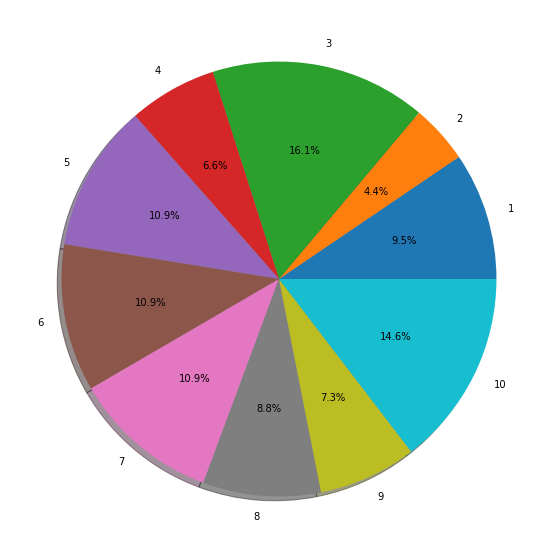

In [112]:
labels=sorted(df['MarketID'].unique())



figure(figsize=(10, 10))

plt.pie( df.groupby('MarketID')['Promotion'].count(), autopct='%1.1f%%', labels=labels,
        shadow=True)
plt.show() 

As you can see above Market 3 have the highest value because the each location have only 1 promotion. Actually, I also realized this issue with looking the number and I will check if my assumption true with the line below;

In [113]:
 df.groupby('LocationID',)['Promotion'].apply(lambda x: x.values)

LocationID
1      [3, 3, 3, 3]
2      [2, 2, 2, 2]
3      [1, 1, 1, 1]
4      [2, 2, 2, 2]
5      [2, 2, 2, 2]
           ...     
916    [2, 2, 2, 2]
917    [3, 3, 3, 3]
918    [1, 1, 1, 1]
919    [1, 1, 1, 1]
920    [2, 2, 2, 2]
Name: Promotion, Length: 137, dtype: object

Lets look at how promotions differ each week. 

In [114]:
df.groupby(["MarketID","LocationID","Promotion","week"])['Promotion'].count()

MarketID  LocationID  Promotion  week
1         1           3          1       1
                                 2       1
                                 3       1
                                 4       1
          2           2          1       1
                                        ..
10        919         1          4       1
          920         2          1       1
                                 2       1
                                 3       1
                                 4       1
Name: Promotion, Length: 548, dtype: int64

In [115]:
df.groupby(["Promotion","week"])['Promotion'].count()

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: Promotion, dtype: int64

In [116]:
df.groupby(["week"])['Promotion'].count()

week
1    137
2    137
3    137
4    137
Name: Promotion, dtype: int64

According to results above there is no difference applied promo program in the locationID. So, we can look at the means and results for the whole duration for each locationID.

In the next step, sales volume of each MarketID will be explored.

In [117]:
salesmarket = df.groupby(['MarketID'])['SalesInThousands']
salesmarket.sum()

MarketID
1     1825.29
2     1482.27
3     7477.51
4     1962.29
5     2930.28
6     2183.85
7     2668.52
8     2349.74
9     2117.63
10    4302.10
Name: SalesInThousands, dtype: float64

In [118]:
labels=df['MarketID'].unique()


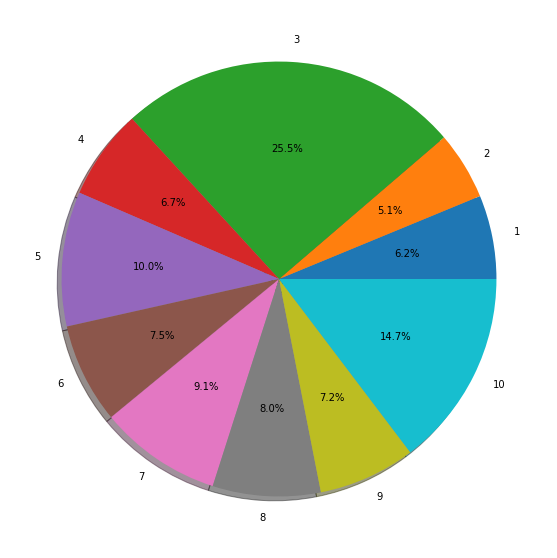

In [119]:

figure(figsize=(10, 10))

plt.pie( salesmarket.sum(), autopct='%1.1f%%', labels=labels,
        shadow=True)
plt.show() 

As observed, Market 3 leads with the highest contribution of 25.5% while Market 10 follows closely with 14.7%. The contributions from the other markets range between 10% - 6%, with Market 2 having the lowest contribution at 5%.

Let's now examine sales volume of promotions applied.

In [120]:
df.groupby(['Promotion'])['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

Promotion 1 & 3 seems higher mean values than Promotion 2.

In [121]:
df.groupby(['Promotion'])['SalesInThousands'].sum()

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64

Accoring total sales volume, Promotion 3 have highest volume with very close to Promotion 2 volume whereas Promotion 2 has lowest volume.

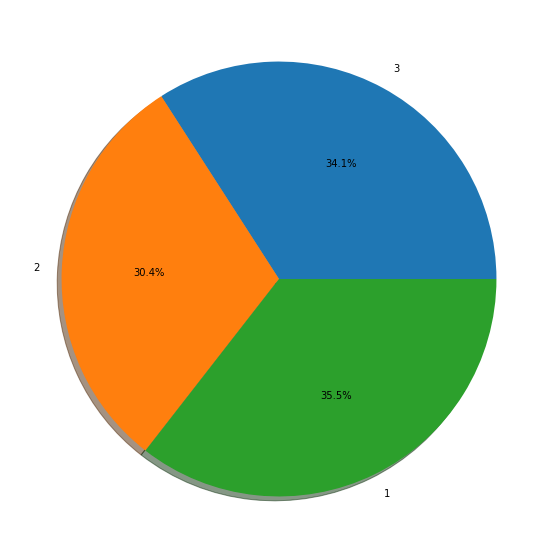

In [122]:

figure(figsize=(10, 10))

plt.pie( df.groupby(['Promotion'])['SalesInThousands'].sum(), autopct='%1.1f%%', labels=df['Promotion'].unique(),
        shadow=True)
plt.show() 

Let's examine the market size information for each MarketID.

<AxesSubplot:xlabel='MarketID', ylabel='count'>

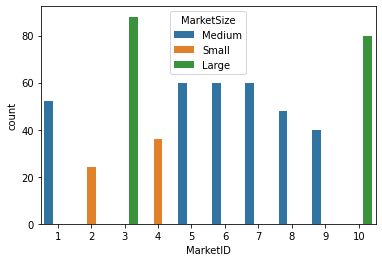

In [123]:
sns.countplot(data=df, x="MarketID", hue="MarketSize")

In [124]:
 df.groupby('MarketID')['MarketSize'].apply(lambda x: x.values)


MarketID
1     [Medium, Medium, Medium, Medium, Medium, Mediu...
2     [Small, Small, Small, Small, Small, Small, Sma...
3     [Large, Large, Large, Large, Large, Large, Lar...
4     [Small, Small, Small, Small, Small, Small, Sma...
5     [Medium, Medium, Medium, Medium, Medium, Mediu...
6     [Medium, Medium, Medium, Medium, Medium, Mediu...
7     [Medium, Medium, Medium, Medium, Medium, Mediu...
8     [Medium, Medium, Medium, Medium, Medium, Mediu...
9     [Medium, Medium, Medium, Medium, Medium, Mediu...
10    [Large, Large, Large, Large, Large, Large, Lar...
Name: MarketSize, dtype: object

Lets examine marketsize promotion relationship.

<AxesSubplot:xlabel='Promotion', ylabel='count'>

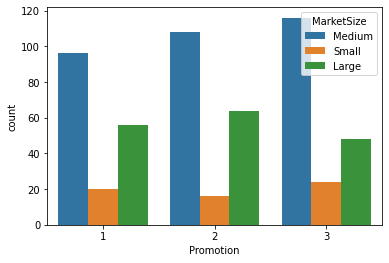

In [125]:
sns.countplot(data=df, x="Promotion", hue="MarketSize")

The distribution of market size for each location ID and week in relation to promotion types appears to be very similar. Medium-sized markets have the highest share, while small markets have the lowest share, similar to what was observed in the market size distribution chart

In [126]:
df.groupby('Promotion')['SalesInThousands'].mean()




Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

# **A/B testing**

One of the major AB test topic that we can explore is the relationship between promotion types and sales volume. We can use a one-way ANOVA test to determine if there is a significant relationship between promotions and sales performance, as we have multiple promotion types (1, 2, 3) to consider.

In [127]:
df.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [128]:
from scipy.stats import f_oneway



# Group the data by Promotion and calculate the mean sales for each group
promotion_sales = df.groupby('Promotion')['SalesInThousands']

# Extract the sales data for each promotion
sales_data = [sales for _, sales in promotion_sales]

# Conduct an ANOVA test to compare the sales for different promotions
stat, p = f_oneway(*sales_data)

if p < 0.05:
    print('There is a significant difference in sales between the promotions.')
else:
    print('There is no significant difference in sales between the promotions.')

There is a significant difference in sales between the promotions.


We have determined that there is a significant difference in sales across different promotion types. To further understand the pairwise differences between these promotion types, I will use a t-test to analyze the pairwise relationships.

In [129]:
from scipy.stats import ttest_ind


# Group the data by Promotion and calculate the mean sales for each group
promotion_sales = df.groupby('Promotion')['SalesInThousands']

# Extract the sales data for each promotion
sales_data = [sales for _, sales in promotion_sales]

# Conduct a t-test to compare the sales for Promotion 1 and Promotion 2
stat, p = ttest_ind(sales_data[0], sales_data[1])

if p < 0.05:
    print('There is a significant difference in sales between Promotion 1 and Promotion 2.')
else:
    print('There is no significant difference in sales between Promotion 1 and Promotion 2.')

# Conduct a t-test to compare the sales for Promotion 2 and Promotion 3
stat, p = ttest_ind(sales_data[1], sales_data[2])

if p < 0.05:
    print('There is a significant difference in sales between Promotion 2 and Promotion 3.')
else:
    print('There is no significant difference in sales between Promotion 2 and Promotion 3.')

# Conduct a t-test to compare the sales for Promotion 1 and Promotion 3
stat, p = ttest_ind(sales_data[0], sales_data[2])

if p < 0.05:
    print('There is a significant difference in sales between Promotion 1 and Promotion 3.')
else:
    print('There is no significant difference in sales between Promotion 1 and Promotion 3.')

There is a significant difference in sales between Promotion 1 and Promotion 2.
There is a significant difference in sales between Promotion 2 and Promotion 3.
There is no significant difference in sales between Promotion 1 and Promotion 3.


According to results, Promotion 2 have significant lower performance compared to promo 1 &3. On the other hand, Promo 1 & 3 are not significantly differ each other. 

Another aspect we can investigate is whether market size has a significant effect on sales volume. We can use similar methods, such as ANOVA or t-test, to determine if there is a correlation between market size and sales volume.

In [130]:
df.groupby('MarketSize')['SalesInThousands'].mean()


MarketSize
Large     70.116726
Medium    43.985344
Small     57.409333
Name: SalesInThousands, dtype: float64

In [131]:
# Group the data by MarketSize and calculate the mean sales for each group
market_size_sales = df.groupby('MarketSize')['SalesInThousands']

# Extract the sales data for each market size
sales_data = [sales for _, sales in market_size_sales]

# Conduct an ANOVA test to compare the sales of stores in different market sizes
stat, p = f_oneway(*sales_data)

if p < 0.05:
    print('There is a significant difference in sales between stores in different market sizes.')
else:
    print('There is no significant difference in sales between stores in different market sizes.')

There is a significant difference in sales between stores in different market sizes.


In [132]:
df['MarketSize'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [133]:
# Group the data by MarketSize and calculate the mean sales for each group
market_size_sales = df.groupby('MarketSize')['SalesInThousands']

# Extract the sales data for each market size
sales_data = [sales for _, sales in market_size_sales]

# Conduct a t-test to compare the sales of stores in Small and Medium market sizes
stat, p = ttest_ind(sales_data[0], sales_data[1])

if p < 0.05:
    print('There is a significant difference in sales between stores in Medium and Small market sizes.')
else:
    print('There is no significant difference in sales between stores in Medium and Small market sizes.')

# Conduct a t-test to compare the sales of stores in Medium and Large market sizes
stat, p = ttest_ind(sales_data[1], sales_data[2])

if p < 0.05:
    print('There is a significant difference in sales between stores in Small and Large market sizes.')
else:
    print('There is no significant difference in sales between stores in Small and Large market sizes.')

# Conduct a t-test to compare the sales of stores in Small and Large market sizes
stat, p = ttest_ind(sales_data[0], sales_data[2])

if p < 0.05:
    print('There is a significant difference in sales between stores in Medium and Large market sizes.')
else:
    print('There is no significant difference in sales between stores in Medium and Large market sizes.')


There is a significant difference in sales between stores in Medium and Small market sizes.
There is a significant difference in sales between stores in Small and Large market sizes.
There is a significant difference in sales between stores in Medium and Large market sizes.


As we can see above, there is significant differences btw market size types. Large ones generate more sales volume and middle ones are the lowest sales value according to this dataset.

In [134]:
df.groupby('MarketID')['SalesInThousands'].mean()


MarketID
1     35.101731
2     61.761250
3     84.971705
4     54.508056
5     48.838000
6     36.397500
7     44.475333
8     48.952917
9     52.940750
10    53.776250
Name: SalesInThousands, dtype: float64

In [135]:
# Group the data by MarketSize and calculate the mean sales for each group
market_size_sales = df.groupby('MarketID')['SalesInThousands']

# Extract the sales data for each market size
sales_data = [sales for _, sales in market_size_sales]

# Conduct an ANOVA test to compare the sales of stores in different market sizes
stat, p = f_oneway(*sales_data)

if p < 0.05:
    print('There is a significant difference in sales between stores in different MarketID.')
else:
    print('There is no significant difference in sales between stores in different MarketID.')

There is a significant difference in sales between stores in different MarketID.


Like mentioned in marketsize, MarketID's sales volume also differ just as expected. This kinds of A/B tests can be done for other income parameters you suspect affect on sales.